## Features extraction

In [2]:
import numpy as np
import pandas as pd
import torch
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objs as go
import subprocess
import os
from umap.umap_ import UMAP


c:\Users\iplov\miniconda3\envs\aml_ego\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
LABELS = [
    "get, take",
    "place, place-on, place-back, put, put-back",
    "open",
    "close",
    "clean, wipe-off, wipe, wash, rinse",
    "cut, chop, slice",
    "mix, mix-around, stir, whisk",
    "pour"
]

In [7]:
if False:   

    # Assicurati di essere nella directory corretta
    os.chdir("C:/Users/iplov/Desktop/Advanced ML/Progetto/github andrew/Egocentric-Vision")
    # Comando da eseguire
    command = [
        'python', 'save_feat.py',
        'config=configs/I3D_save_feat.yaml',
        'dataset.shift=D1-D1',
        'dataset.RGB.data_path=D:/ek_data/frames',
        'save.dense_sampling.RGB=true',
        'save.num_frames_per_clip.RGB=5',
        'name=saved_feat_I3D_5_Dense'
    ]

    # Esegui il comando
    result = subprocess.run(command, capture_output=True, text=True)

    # Stampa l'output e l'errore
    print('Output:', result.stdout)
    #print('Error:', result.stderr)

    # Verifica il codice di uscita
    if result.returncode != 0:
        print(f'Command failed with return code {result.returncode}')

In [8]:
# Assicurati di essere nella directory corretta
os.chdir("C:/Users/iplov/Desktop/Advanced ML/Progetto/github andrew/Egocentric-Vision")
num_frames_list = [5,10,25]
#DENSE
if False:
    for n in num_frames_list:
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=D:/ek_data/frames',
            'save.dense_sampling.RGB=true',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_dense'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        #print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

    #UNIFORM
    for n in num_frames_list:
        print(f"UNIFORM n = {n}")
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=D:/ek_data/frames',
            'save.dense_sampling.RGB=false',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_uniform'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        #print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

### Extract train feature

In [1]:
# Assicurati di essere nella directory corretta
os.chdir("C:/Users/iplov/Desktop/Advanced ML/Progetto/github andrew/Egocentric-Vision")
num_frames_list = [5,10,25]
#DENSE
if True:
    for n in num_frames_list:
        print(f"DENSE n = {n}")
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=D:/ek_data/frames',
            'save.dense_sampling.RGB=true',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_dense',
            'split=train'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

        print(f"UNIFORM n = {n}")
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=D:/ek_data/frames',
            'save.dense_sampling.RGB=false',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_uniform',
            'split=train'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

        

NameError: name 'os' is not defined

## Read extracted feature

In [9]:
features = pd.read_pickle("./saved_features/saved_feat_I3D_10_dense_D1_test.pkl")
#print(features['features'][0])
print(len(features['features']))
#print(features['features'][0]['features_RGB'])
#print(features['features'][0]['label'])
print(features['features'][0].keys())
list_of_features = [np.mean(np.array(feature['features_RGB']),axis=0) for feature in features["features"]]
clips_feature = list_of_features
labels = [feature['label'] for feature in features["features"]]
labels_extended = [label for label in labels for _ in range(5)]
print(labels_extended[0:20])
list_of_features = [np.array(f) for feature in features["features"] for f in feature['features_RGB']]

435
dict_keys(['uid', 'video_name', 'features_RGB', 'label'])
[0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0]


# K-Means

In [10]:
clips_feature_tensor = np.array(clips_feature)

print(clips_feature_tensor.shape)

(435, 1024)


## plot using TSNE 2D

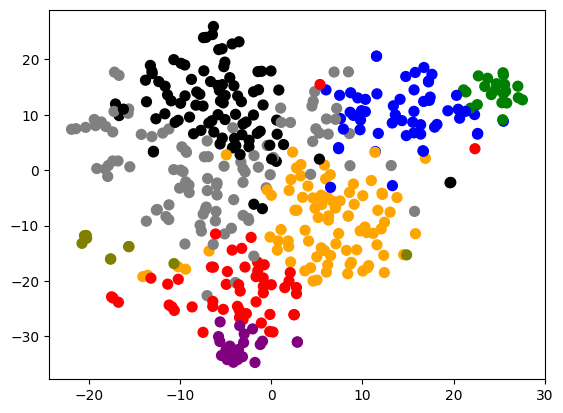

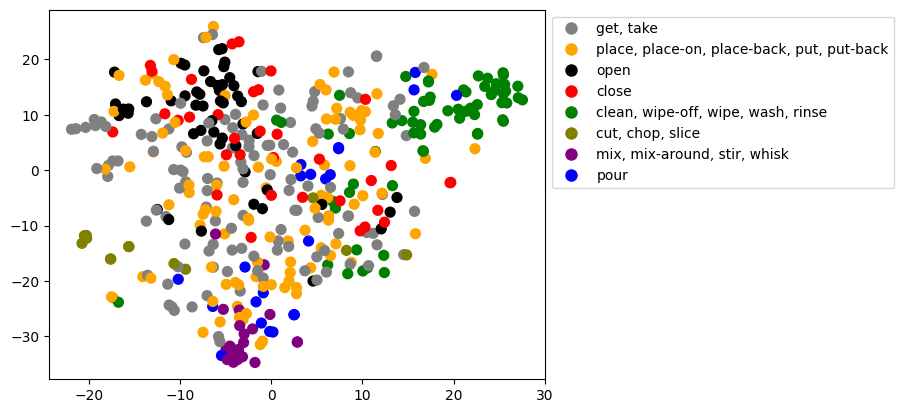

In [11]:
#plot k-means labels
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)
cmap = ListedColormap(['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive'])

y_kmeans = kmeans.predict(clips_feature_tensor)

tsne = TSNE(n_components=2, random_state=42)
# Addestrare il modello e trasformare i dati
X = tsne.fit_transform(clips_feature_tensor)
# scatter plot of X values
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,cmap=cmap, s=50)

plt.show()

#plot real labels
cmap = ListedColormap(['gray', 'orange', 'black', 'red', 'green', 'olive', 'purple', 'blue'])
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i),  markersize=10, label=desc) 
                for i, desc in enumerate(LABELS)]
plt.figure(2)

# scatter plot of X values
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, s=50)
# Add the legend
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))


plt.show()


## plot using TSNE 3D

In [12]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)
cmap = ['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive']
kmeans_color_map = {f"{i}": color for i, color in enumerate(cmap)}

y_kmeans = kmeans.predict(clips_feature_tensor)

tsne = TSNE(n_components=3, random_state=42)
# Addestrare il modello e trasformare i dati
X = tsne.fit_transform(clips_feature_tensor)
# scatter plot of X values
df = pd.DataFrame(X, columns=['x', 'y', 'z'])
df['kmeans'] = y_kmeans.astype(str)
df['labels'] = np.array(labels).astype(str)


#plot label k_means
fig = px.scatter_3d(df, x='x', y='y', z='z', color="kmeans", color_discrete_map=kmeans_color_map, title="plot using k_means label")
fig.update_traces(marker_size=4)
fig.show()


cmap = ['blue', 'orange', 'black', 'red', 'green', 'olive', 'purple', 'gray']
#plot real label
fig = go.Figure()
for i, label in enumerate(LABELS):
    class_data = df[df['labels'] == str(i)]
    fig.add_trace(go.Scatter3d(
        x=class_data['x'], y=class_data['y'], z=class_data['z'],
        mode='markers',
        marker=dict(size=10, color=cmap[i]),
        name=label
    ))
fig.update_traces(marker_size=4)
fig.show()

## UMAP 2D


c:\Users\iplov\miniconda3\envs\aml_ego\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



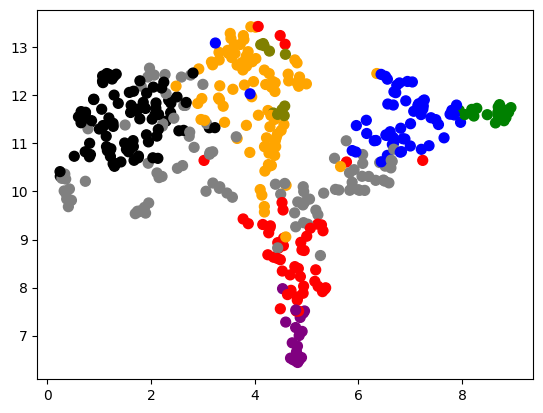

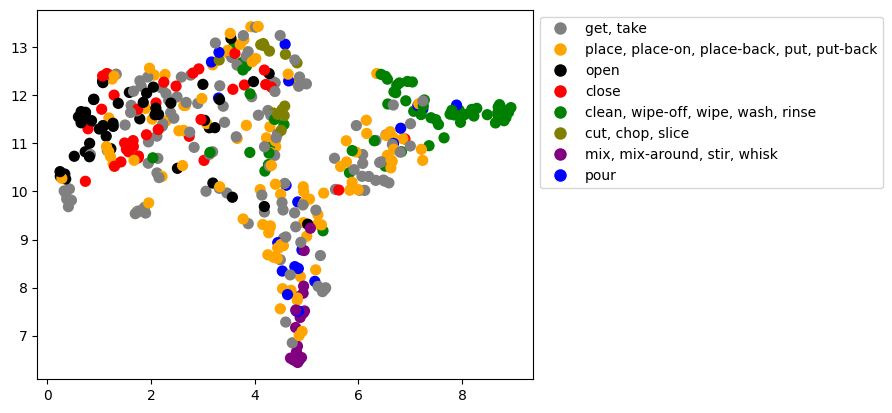

In [13]:
umap_2d = UMAP(n_components=2, init='random', random_state=0)
proj_2d = umap_2d.fit_transform(clips_feature_tensor)


#plot k-means labels
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)
cmap = ListedColormap(['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive'])

y_kmeans = kmeans.predict(clips_feature_tensor)

# scatter plot of X values
plt.figure(1)
plt.scatter(proj_2d[:, 0], proj_2d[:, 1], c=y_kmeans,cmap=cmap, s=50)

plt.show()

#plot real labels
cmap = ListedColormap(['gray', 'orange', 'black', 'red', 'green', 'olive', 'purple', 'blue'])
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i),  markersize=10, label=desc) 
                for i, desc in enumerate(LABELS)]
plt.figure(2)

# scatter plot of X values
plt.scatter(proj_2d[:, 0], proj_2d[:, 1], c=labels, cmap=cmap, s=50)
# Add the legend
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))


plt.show()


## UMAP 3D

In [14]:
cmap = ['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive']
color_map = {f"{i}": color for i, color in enumerate(cmap)}

umap_3d = UMAP(n_components=3, init='random', random_state=0)
proj_3d = umap_3d.fit_transform(clips_feature_tensor)

df3d = pd.DataFrame(proj_3d, columns=['x', 'y', 'z'])
df3d['kmeans'] = y_kmeans.astype(str)
df3d['labels'] = np.array(labels).astype(str)

#plot kmeans
fig_3d = px.scatter_3d(
    df3d, x='x', y='y', z='z',
    color='kmeans', color_discrete_map=color_map
)
fig_3d.update_traces(marker_size=5)
fig_3d.show()


cmap = ['blue', 'orange', 'black', 'red', 'green', 'gray', 'purple', 'olive']
kmeans_color_map = {f"{i}": color for i, color in enumerate(cmap)}
custom_legend = {f"{i}": label_name for i, label_name in enumerate(LABELS)}
#plot real label
fig = go.Figure()
for i, label in enumerate(LABELS):
    class_data = df3d[df3d['labels'] == str(i)]
    fig.add_trace(go.Scatter3d(
        x=class_data['x'], y=class_data['y'], z=class_data['z'],
        mode='markers',
        marker=dict(size=10, color=cmap[i]),
        name=label
    ))
fig.update_traces(marker_size=5)
fig.show()

c:\Users\iplov\miniconda3\envs\aml_ego\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



## read actionet

In [19]:
features = pd.read_pickle("./action-net/ActionNet_train.pkl")
#print(features['features'][0])
print(features.keys())
#print(features['features'][0]['features_RGB'])
#print(features['features'][0]['label'])
l = list(zip(features['index'][0:20],features['file'][0:20],features['description'][0:20],features['labels'][0:20]))
for el in l:
    print(el)

Index(['index', 'file', 'description', 'labels'], dtype='object')
(40, 'S08_1.pkl', 'Spread jelly on a bread slice', 'Spread')
(10, 'S04_1.pkl', 'Get/replace items from refrigerator/cabinets/drawers', 'Get/Put')
(6, 'S03_1.pkl', 'Clear cutting board', 'Clear')
(24, 'S08_1.pkl', 'Clear cutting board', 'Clear')
(6, 'S04_1.pkl', 'Slice a cucumber', 'Slice')
(23, 'S02_2.pkl', 'Clear cutting board', 'Clear')
(15, 'S02_3.pkl', 'Clean a pan with a sponge', 'Clean')
(12, 'S07_1.pkl', 'Get/replace items from refrigerator/cabinets/drawers', 'Get/Put')
(1, 'S06_1.pkl', 'Get/replace items from refrigerator/cabinets/drawers', 'Get/Put')
(47, 'S06_2.pkl', 'Clean a pan with a towel', 'Clean')
(1, 'S03_2.pkl', 'Get items from refrigerator/cabinets/drawers', 'Get/Put')
(17, 'S04_1.pkl', 'Slice a potato', 'Slice')
(30, 'S03_2.pkl', 'Clean a pan with a towel', 'Clean')
(45, 'S07_1.pkl', 'Pour water from a pitcher into a glass', 'Pour')
(28, 'S03_2.pkl', 'Clean a pan with a sponge', 'Clean')
(20, 'S03_2.p